In [2]:
# hello!

import numpy as np
import pandas as pd
import pickle
import sklearn.cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# csv_file_name = "final_data_crashes_final_final.csv"
csv_file_name = "final_data_crashes_small.csv"

df = pd.read_csv(csv_file_name)

# create a new df that is just df but with only 100 random rows

In [3]:
cols = []
for col in df.items():
    cols.append(col[1].tolist())
data = list(zip(*cols))


# print(data)

# store the column names

col_names = []
for j in range(len(df.columns)):
    column_name = df.columns[j]
    # print('    Column', column_name)
    col_names.append(column_name)

In [4]:
datanp = np.array(data)
# print the first row of the data
print(datanp[0])

[ 2.00000000e+00  1.63915397e+09  3.43000000e+02  5.95660000e+04
  7.72000000e+02  3.40718810e+01 -1.18117294e+02  1.36200000e+00
  1.00000000e+00  5.90000000e+01  5.90000000e+01  6.70000000e+01
  3.00200000e+01  1.00000000e+01  5.00000000e+00  0.00000000e+00
 -3.55000000e+00 -3.55000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

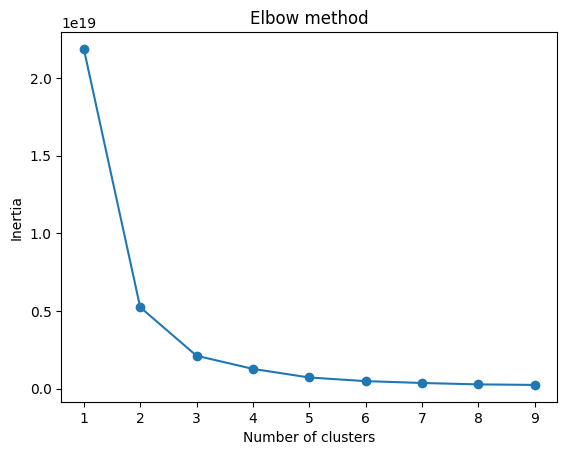

In [5]:
# Borrowed from https://www.w3schools.com/python/python_ml_k-means.asp#:~:text=K%2Dmeans%20is%20an%20unsupervised,the%20variance%20in%20each%20cluster.

num_clusters_tried = 10
inertias = []
for i in range(1, num_clusters_tried):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(datanp)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,num_clusters_tried), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
# normalize all features in the np array

# first print statistics about the data before it is normalized by column
pd.options.display.max_columns = datanp.shape[1]
# print("mean of each column before normalization: ", np.mean(datanp, axis=0))
# print("standard deviation of each column before normalization: ", np.std(datanp, axis=0))
datapd = pd.DataFrame(datanp)
display(datapd.describe(include = 'all'))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(datanp)
datanp = scaler.transform(datanp)
datapd = pd.DataFrame(datanp)
display(datapd.describe(include = 'all'))

# print statistics about the data to see if it's normalized by column
# print("mean of each column after normalization: ", np.mean(datanp, axis=0))
# print("standard deviation of each column after normalization: ", np.std(datanp, axis=0))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158
count,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.000000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.0000,10000.000000,10000.0000,10000.00000,10000.00000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,2.145700,1.595952e+09,212.924900,48008.657200,2.513450e+04,36.222605,-96.999401,0.692127,0.826000,61.430110,60.264490,64.776700,29.468376,9.073448,7.37545,0.005468,-1.035877,-0.362078,0.009200,0.000300,0.069300,0.001700,0.099100,0.001700,0.008100,0.0,0.024700,0.021400,0.000500,0.089900,0.0,0.633600,0.676800,0.725600,0.76680,0.060100,0.126700,0.002200,0.000600,0.395700,0.005200,0.016100,0.0,0.011400,0.000200,0.004800,0.000400,0.000600,0.001000,0.0001,0.0,0.002400,0.0001,0.0001,0.000500,0.048600,0.001700,0.001500,0.013900,0.000900,0.000300,0.000500,0.131400,0.002300,0.00070,0.035500,0.087200,0.00210,0.000600,0.011600,0.0001,0.017800,0.000400,0.0,0.002400,0.002300,0.0001,0.002800,0.0001,0.00210,0.00350,0.0001,0.0001,0.001200,0.006300,0.004000,0.0184,0.278800,0.00830,0.010500,0.003300,0.002700,0.143700,0.012900,0.003200,0.003400,0.017000,0.008900,0.003100,0.002900,0.017800,0.002200,0.020800,0.001300,0.016600,0.035400,0.011100,0.001000,0.005300,0.031900,0.001000,0.000800,0.000800,0.018000,0.00070,0.002000,0.036700,0.009200,0.00440,0.042300,0.035100,0.001700,0.033700,0.0,0.019500,0.053600,0.016800,0.036200,0.0,0.010400,0.003900,0.002200,0.000200,12.832900,0.022000,0.020700,0.0184,0.016800,0.016900,0.030900,0.038200,0.05060,0.049000,0.042000,0.033100,0.036600,0.048500,0.053300,0.06660,0.074200,0.076000,0.080100,0.064400,0.042500,0.031700,0.032700,0.02990,0.024900,6.996300
std,0.496081,4.675195e+07,112.075236,20997.601145,5.955393e+05,5.356568,18

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-3.439027e-16,1.778666e-15,-7.460699e-17,-7.052137e-17,7.105427e-19,-5.537970e-15,1.863327e-14,1.463718e-16,1.008971e-16,8.105516e-16,-7.924328e-16,-2.430056e-16,-3.070042e-14,3.048228e-16,-1.594458e-15,8.526513e-17,-2.209788e-16,5.471179e-17,2.948752e-17,3.197442e-18,1.492140e-17,2.380318e-17,1.740830e-17,2.309264e-17,1.776357e-18,0.0,3.126388e-17,2.238210e-17,1.421085e-18,8.011369e-17,0.0,-1.257661e-16,8.064660e-17,-2.167155e-17,-1.172396e-16,3.339551e-17,-3.996803e-18,-2.131628e-17,1.705303e-17,1.264766e-16,2.557954e-17,9.237056e-18,0.0,-1.953993e-17,-1.776357e-17,-3.694822e-17,1.030287e-17,1.278977e-17,-1.278977e-17,-4.973799e-18,0.0,3.126388e-17,-2.131628e-18,-1.101341e-17,1.705303e-17,5.613288e-17,-1.527667e-17,6.394885e-18,1.918465e-17,1.421085e-17,1.065814e-17,1.101341e-17,5.897505e-17,-6.394885e-18,-1.136868e-17,-1.918465e-17,5.986323e-17,-5.684342e-18,1.634248e-17,-3.126388e-17,-2.842171e-18,-3.552714e-17,9.947598e-18,0.0,7.105427e-18,-2.593481e-17,-5.684342e-18,4.547474e-17,-5.684342e-18,3.197442e-17,8.526513e-18,-6.394885e-18,-1.136868e-17,2.273737e-17,-2.309264e-17,-4.334311e-17,-1.278977e-17,4.263256e-17,-1.634248e-17,-3.694822e-17,3.197442e-18,-3.197442e-18,2.984279e-17,3.126388e-17,7.815970e-18,7.815970e-18,-5.542233e-17,6.323830e-17,-5.400125e-17,4.689582e-17,-1.705303e-17,-1.634248e-17,-1.421085e-17,3.552714e-18,1.278977e-17,1.652012e-17,-4.405365e-17,9.947598e-18,-3.375078e-18,7.531753e-1

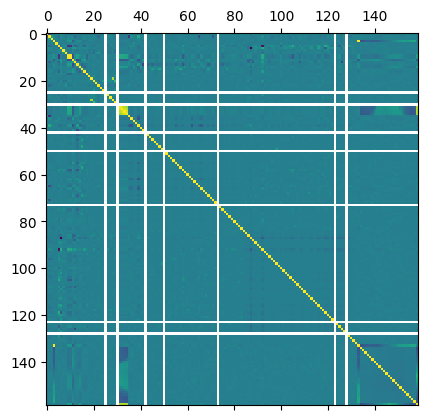

In [7]:
# display the correlation matrix
# display(np.corrcoef(datanp, rowvar=False))
plt.matshow(datapd.corr())
plt.show()

In [89]:
# print which columns are most correlated
corr = datapd.corr()
features_and_correlations = []

for i in range(corr.shape[0]):
    for j in range(i,corr.shape[1]):
        if abs(corr.iloc[i,j]) > 0.75 and i != j:
            features_and_correlations.append((col_names[i], col_names[j], corr.iloc[i,j]))

# sort by absolute value of correlation
features_and_correlations.sort(key=lambda tup: abs(tup[2]), reverse=True)

for feature in features_and_correlations:
    print("Column", feature[0], "is correlated with Column " + feature[1] + " with correlation coefficient ", feature[2])



Column Seconds Since Start Of Day is correlated with Column Hour with correlation coefficient  0.9987862440293226
Column Temperature(F) is correlated with Column Wind Chill(F) with correlation coefficient  0.9937407066857651
Column Sunrise_Sunset is correlated with Column Civil_Twilight with correlation coefficient  0.9087310192841874
Column Nautical_Twilight is correlated with Column Astronomical_Twilight with correlation coefficient  0.8946474911220054
Column Civil_Twilight is correlated with Column Nautical_Twilight with correlation coefficient  0.8898932558892708
Column Sunrise_Sunset is correlated with Column Nautical_Twilight with correlation coefficient  0.8086736054783756
Column Civil_Twilight is correlated with Column Astronomical_Twilight with correlation coefficient  0.7965103713881471
Column Sunrise_Sunset is correlated with Column Amount of Light with correlation coefficient  0.7880149073056908
Column Civil_Twilight is correlated with Column Amount of Light with correlatio

In [87]:
# print which columns are most correlated
corr = datapd.corr()
features_and_correlations = []

for i in range(1):
    for j in range(corr.shape[1]):
        if abs(corr.iloc[i,j]) > 0.1 and i != j:
            features_and_correlations.append((col_names[i], col_names[j], corr.iloc[i,j]))

# sort by absolute value of correlation
features_and_correlations.sort(key=lambda tup: abs(tup[2]), reverse=True)

for feature in features_and_correlations:
    print("Column", feature[0], "is correlated with Column " + feature[1] + " with correlation coefficient ", feature[2])

Column Severity is correlated with Column StartTime with correlation coefficient  -0.32138221238246945
Column Severity is correlated with Column Clear with correlation coefficient  0.19121029302163728
Column Severity is correlated with Column Overcast with correlation coefficient  0.12776592301014056
Column Severity is correlated with Column Fair with correlation coefficient  -0.1267810716900234
Column Severity is correlated with Column CA with correlation coefficient  -0.11968013344828464
Column Severity is correlated with Column Scattered Clouds with correlation coefficient  0.11749484257745287
Column Severity is correlated with Column Start Longitude with correlation coefficient  0.11004470581532882
Column Severity is correlated with Column IL with correlation coefficient  0.10328313828756285
Column Severity is correlated with Column CO with correlation coefficient  0.10200421002367245


In [91]:
# print which columns are most correlated
corr = datapd.corr()
features_and_correlations = []

for i in range(84,133):
    for j in range(1):
        if abs(corr.iloc[i,j]) > 0.05 and i != j:
            features_and_correlations.append((col_names[i], col_names[j], corr.iloc[i,j]))

# sort by absolute value of correlation
features_and_correlations.sort(key=lambda tup: abs(tup[2]), reverse=True)

for feature in features_and_correlations:
    print("Column", feature[0], "is correlated with Column " + feature[1] + " with correlation coefficient ", feature[2])

Column CA is correlated with Column Severity with correlation coefficient  -0.11968013344828464
Column IL is correlated with Column Severity with correlation coefficient  0.10328313828756285
Column CO is correlated with Column Severity with correlation coefficient  0.10200421002367245
Column GA is correlated with Column Severity with correlation coefficient  0.09862112580303531
Column WI is correlated with Column Severity with correlation coefficient  0.09482338524653461
Column MI is correlated with Column Severity with correlation coefficient  0.09279603653996495
Column MD is correlated with Column Severity with correlation coefficient  0.06878297910601162
Column FL is correlated with Column Severity with correlation coefficient  -0.06285354287716174
Column IN is correlated with Column Severity with correlation coefficient  0.05587722181260151
Column CT is correlated with Column Severity with correlation coefficient  0.052808331171607936


In [94]:
# print which columns are most correlated
corr = datapd.corr()
features_and_correlations = []

for i in range(133,159):
    for j in range(1):
        if abs(corr.iloc[i,j]) > 0.01 and i != j:
            features_and_correlations.append((col_names[i], col_names[j], corr.iloc[i,j]))

# sort by absolute value of correlation
features_and_correlations.sort(key=lambda tup: abs(tup[2]), reverse=True)

for feature in features_and_correlations:
    print("Column", feature[0], "is correlated with Column " + feature[1] + " with correlation coefficient ", feature[2])

Column Amount of Light is correlated with Column Severity with correlation coefficient  -0.028273843403306746
Column Hour_0 is correlated with Column Severity with correlation coefficient  0.027412230800836292
Column Hour_15 is correlated with Column Severity with correlation coefficient  -0.02008194085877761
Column Hour_13 is correlated with Column Severity with correlation coefficient  -0.019436581977669697
Column Hour_14 is correlated with Column Severity with correlation coefficient  -0.019434086393001062
Column Hour is correlated with Column Severity with correlation coefficient  -0.01888561779715923
Column Hour_18 is correlated with Column Severity with correlation coefficient  0.0182067032620307
Column Hour_3 is correlated with Column Severity with correlation coefficient  0.018073268672042005
Column Hour_8 is correlated with Column Severity with correlation coefficient  0.017376303440288718
Column Hour_9 is correlated with Column Severity with correlation coefficient  0.0168898

In [28]:
arr = np.array(data)
arrT = arr.transpose()

U, D, V = np.linalg.svd(arrT)


In [27]:
threshold = 0.01
top_eigenpoint = U[:1][0] # The highest weighted "eigen" data point

print(U.shape)

print("Most Significant Features (weight > {0}):\n".format(threshold))
print("Feature\t\t\t\tWeight")
print("------------------------------------------------")

most_sig_features = []
for i in range(top_eigenpoint.size):
    if(top_eigenpoint[i] > threshold):
        most_sig_features.append((i, df.columns[i], top_eigenpoint[i]))

most_sig_features.sort(key=lambda x:x[2],reverse=True)
for feature in most_sig_features:
    print("{0}. {1:<20}\t{2}".format(feature[0], feature[1], feature[2]))

(159, 159)
Most Significant Features (weight > 0.01):

Feature				Weight
------------------------------------------------
16. Wind x              	0.8149465236831045
14. Wind Speed(mph)     	0.10014270445143507
32. Civil_Twilight      	0.07715116931380682
22. Junction            	0.06687489577223638
28. Traffic_Calming     	0.036008568100889315
27. Stop                	0.030758651957351044
54. Light Freezing Rain 	0.03027905424800274
45. Heavy Rain          	0.029368795658261428
20. Crossing            	0.025622063545044302
82. Thunderstorms and Rain	0.024764043188853266
12. Pressure(in)        	0.02010499094039616
25. Roundabout          	0.01971952366450705
56. Light Rain / Windy  	0.01851604932854415
47. Heavy Snow          	0.01839686675376408
68. Patches of Fog      	0.01786765473577251
72. Shallow Fog         	0.01614101424164676
42. Fog / Windy         	0.015228836911873232
35. Clear               	0.015194268297566238
78. T-Storm / Windy     	0.014039769378308717
40. Fair / Win